# Inteligencia Artificial aplicada a la Meteorología

<a target="_blank" href="https://colab.research.google.com/github/griverat/Meteo-AI/blob/main/notebooks/1.intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Descripción

Este notebook contiene el material a desarrollar durante la primera sesión del taller de Inteligencia Artificial aplicada a la Meteorología. Se presentarán los conceptos básicos de la inteligencia artificial y se describirán los pasos a seguir para implementar modelos simples en Pytorch y Tensorflow.

Cabe notar que no se hara uso del paquete `sklearn` ya que la finalidad de este taller es el poder entender e implementar modelos de Deep Learning los cuales son más complejos y poderosos que los modelos tradicionales (como los de `sklearn`). Sin embargo, esto no implica que los modelos simples no sean útiles, de hecho, en muchos casos los modelos simples son suficientes para resolver problemas de clasificación y regresión.

## Objetivos

- Entender los conceptos básicos de la inteligencia artificial.
- Implementar un modelo simple en Pytorch.
- Implementar un modelo simple en Tensorflow.

In [1]:
# Solo correr esta celda si se usa google colab
# Quitar el comentario (#) a los comandos que comienzan con !

!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=baebce079718d004a32aa06835bb69d851088c7bfcab394c14c0d32f9d957d9d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
!mkdir data
!wget https://raw.githubusercontent.com/griverat/Meteo-AI/main/notebooks/data/campo_de_marte.csv -O data/campo_de_marte.csv

--2024-06-20 04:50:08--  https://raw.githubusercontent.com/griverat/Meteo-AI/main/notebooks/data/campo_de_marte.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135270 (132K) [text/plain]
Saving to: ‘data/campo_de_marte.csv’

data/campo_de_marte 100%[===================>] 132.10K  --.-KB/s    in 0.01s   

2024-06-20 04:50:08 (11.0 MB/s) - ‘data/campo_de_marte.csv’ saved [135270/135270]



---

## Introducción a la Inteligencia Artificial

La inteligencia artificial (IA) es una rama de la informática que se encarga de desarrollar algoritmos y modelos que permiten a las máquinas aprender de los datos y realizar tareas que normalmente requieren de la inteligencia humana. Existen diferentes tipos de algoritmos de IA, sin embargo, en este taller nos enfocaremos en los modelos de Deep Learning.

Los modelos de Deep Learning son un subconjunto de los modelos de IA que se basan en redes neuronales artificiales. Estos modelos son capaces de aprender patrones complejos en los datos y realizar tareas como clasificación, regresión, segmentación, entre otros.

Para poder implementar un modelo de Deep Learning es necesario seguir los siguientes pasos:

1. Preprocesar los datos.
2. Definir el modelo.
3. Entrenar el modelo.
4. Evaluar el modelo.
5. Hacer predicciones.

En este notebook se presentarán los pasos 2 y 3 para implementar un modelo simple (ANN) en Pytorch y Tensorflow. Para ello, se utilizará un conjunto de datos de ejemplo que contiene datos de la estacion meteorológica ubicada en Campo de Marte (Lima, Perú) para el año 2024.

## Pytorch vs Tensorflow: ¿Cuál elegir?

Pytorch y Tensorflow son dos de los frameworks más populares para implementar modelos de Deep Learning. Ambos frameworks tienen ventajas y desventajas, por lo que la elección de uno u otro dependerá de las necesidades y preferencias del desarrollador.

Pytorch es un framework de código abierto desarrollado por Facebook que se caracteriza por su facilidad de uso y flexibilidad. Pytorch utiliza un enfoque dinámico para definir y entrenar modelos, lo que permite a los desarrolladores modificar el grafo computacional en tiempo de ejecución. Esto hace que Pytorch sea ideal para prototipar modelos y experimentar con diferentes arquitecturas.

Tensorflow, por otro lado, es un framework de código abierto desarrollado por Google que se caracteriza por su escalabilidad y eficiencia. Tensorflow utiliza un enfoque estático para definir y entrenar modelos, lo que permite a los desarrolladores optimizar el grafo computacional antes de ejecutarlo. Esto hace que Tensorflow sea ideal para entrenar modelos en grandes conjuntos de datos y desplegarlos en entornos de producción.

En pocas palabras, la elección que hagamos dependerá de nuestras necesidades y preferencias. El notebook de hoy nos permitirá ver cómo implementar un modelo simple en Pytorch y Tensorflow, lo que nos dará una idea de cómo se trabaja con cada uno de estos frameworks.

### Importar librerías

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
from ydata_profiling import ProfileReport

plt.rcParams["font.family"] = "monospace"

### Lectura de datos

La data que utilizaremos en este notebook fue descargada del Servicio Nacional de Meteorología e Hidrología del Perú (SENAMHI) y contiene información de la estación meteorológica ubicada en Campo de Marte (Lima, Perú) para el año 2024. La data contiene las siguientes variables:

- Fecha: Fecha en formato `YYYY/MM/DD`.
- Hora: Hora en formato `HH:MM`.
- Temperatura: Temperatura en grados Celsius.
- Precipitación: Precipitación en milímetros por hora.
- Humedad: Humedad relativa en porcentaje.
- Dirección del viento: Dirección del viento en grados.
- Velocidad del viento: Velocidad del viento en metros por segundo.

Para leer la data utilizaremos la librería `pandas` y mostraremos las primeras 5 filas del dataset para tener una idea de cómo se ve la data.

In [4]:
station_data = pd.read_csv("data/campo_de_marte.csv", skiprows=10)

# renombramos las columnas a algo más amigable
station_data.columns = [
    "date",
    "hour",
    "temp",
    "precip",
    "humidity",
    "wind_dir",
    "wind_speed",
]

# combinamos las columnas de fecha y hora en una sola
station_data["date"] = pd.to_datetime(station_data["date"] + " " + station_data["hour"])
station_data = station_data.drop(columns=["hour"])

# convertimos las columnas de temperatura, precipitación, humedad y velocidad del viento a números
station_data["temp"] = pd.to_numeric(
    station_data["temp"], errors="coerce", downcast="float"
)
station_data["precip"] = pd.to_numeric(
    station_data["precip"], errors="coerce", downcast="float"
)
station_data["humidity"] = pd.to_numeric(
    station_data["humidity"], errors="coerce", downcast="float"
)
station_data["wind_dir"] = pd.to_numeric(
    station_data["wind_dir"], errors="coerce", downcast="float"
)
station_data["wind_speed"] = pd.to_numeric(
    station_data["wind_speed"], errors="coerce", downcast="float"
)

# eliminamos las filas con valores faltantes
station_data = station_data.dropna()
station_data.head()

,date,temp,precip,humidity,wind_dir,wind_speed
0,2024-01-01 00:00:00,21.500000,0.0,87.0,247.0,1.7
1,2024-01-01 01:00:00,21.400000,0.0,88.0,249.0,1.6
2,2024-01-01 02:00:00,21.200001,0.0,88.0,253.0,1.2
3,2024-01-01 03:00:00,21.299999,0.0,88.0,242.0,0.8
4,2024-01-01 04:00:00,21.200001,0.0,89.0,233.0,1.2


Ahora podemos verificar que los datos se encuentran listos para su uso

In [5]:
station_data.dtypes

date          datetime64[ns]
temp                 float32
precip               float32
humidity             float32
wind_dir             float32
wind_speed           float32
dtype: object

In [6]:
station_data.describe(exclude=[np.datetime64])

,temp,precip,humidity,wind_dir,wind_speed
count,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000
mean,22.509684,0.000385,81.937279,234.263550,1.183989
std,3.535343,0.006195,9.653942,32.914455,0.612799
min,13.900000,0.000000,48.000000,0.000000,0.000000
25%,20.500000,0.000000,75.000000,230.000000,0.700000
50%,22.700001,0.000000,83.000000,236.000000,1.100000
75%,25.000000,0.000000,90.000000,243.000000,1.600000
max,33.700001,0.100000,100.000000,357.000000,3.400000


Podemos generar un reporte automático de la data utilizando la librería `ydata_profiling` para tener una idea de cómo se distribuyen los datos y si existen valores faltantes.

In [7]:
ProfileReport(station_data, title="Campo de Marte Station Data Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Implementación de un modelo simple en Pytorch

En esta sección implementaremos un red neuronal artificial (ANN) en Pytorch. El modelo consistirá de capas densas que tomará como entrada la temperatura, la humedad y velocidad del viento para predecir la temperatura de la hora siguiente.

### Separación de los datos

Antes de implementar el modelo, es necesario separar los datos en un conjunto de entrenamiento, un conjunto de validación y un conjunto de prueba. En este caso, utilizaremos el 70% de los datos para entrenar el modelo, el 15% para validar el modelo y el 15% para probar el modelo.

In [8]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

In [9]:
station_data["next_temp"] = station_data["temp"].shift(-1)
station_data = station_data.dropna()
station_data

,date,temp,precip,humidity,wind_dir,wind_speed,next_temp
0,2024-01-01 00:00:00,21.500000,0.0,87.0,247.0,1.7,21.400000
1,2024-01-01 01:00:00,21.400000,0.0,88.0,249.0,1.6,21.200001
2,2024-01-01 02:00:00,21.200001,0.0,88.0,253.0,1.2,21.299999
3,2024-01-01 03:00:00,21.299999,0.0,88.0,242.0,0.8,21.200001
4,2024-01-01 04:00:00,21.200001,0.0,89.0,233.0,1.2,21.200001
...,...,...,...,...,...,...,...
3639,2024-05-31 18:00:00,15.000000,0.0,94.0,241.0,0.7,15.100000
3640,2024-05-31 19:00:00,15.100000,0.0,94.0,248.0,0.7,15.000000
3641,2024-05-31 20:00:00,15.000000,0.0,94.0,247.0,0.5,14.900000
3642,2024-05-31 21:00:00,14.900000,0.0,95.0,243.0,1.0,14.800000


In [10]:
train_size = int(len(station_data) * 0.7)
val_size = int(len(station_data) * 0.15)
test_size = len(station_data) - train_size - val_size

train_data = station_data[["temp", "humidity", "wind_speed"]].iloc[:train_size]
train_label = station_data["next_temp"].iloc[:train_size]

val_data = station_data[["temp", "humidity", "wind_speed"]].iloc[
    train_size : train_size + val_size
]
val_label = station_data["next_temp"].iloc[train_size : train_size + val_size]

test_data = station_data[["temp", "humidity", "wind_speed"]].iloc[
    train_size + val_size :
]
test_label = station_data["next_temp"].iloc[train_size + val_size :]

Una vez separados, usamos el set de entrenamiento para estandarizar los datos.

In [11]:
mean = train_data.mean()
std = train_data.std()

train_data_standarized = (train_data - mean) / std
val_data_standarized = (val_data - mean) / std
test_data_standarized = (test_data - mean) / std

Pytorch proporciona la clase `Dataset` para cargar y manipular los datos. En este caso, crearemos una clase `WeatherDataset` que hereda de la clase `Dataset` y que tomará como entrada los datos y las etiquetas. Para este caso, las entradas serán la temperatura, la humedad y la velocidad del viento, y las etiquetas serán la temperatura de la hora siguiente.

In [12]:
class WeatherDataset(torch.utils.data.Dataset):
    def __init__(self, data_standarized, next_temp):
        self.input = data_standarized[["temp", "humidity", "wind_speed"]].values
        self.output = next_temp.values

    def __len__(self):
        return self.input.shape[0]

    def __getitem__(self, idx):
        return self.input[idx], self.output[idx]

Luego de definir la clase `WeatherDataset`, crearemos tres instancias de esta clase: una para el conjunto de entrenamiento, una para el conjunto de validación y una para el conjunto de prueba. Seguidamente, crearemos tres instancias de la clase `DataLoader` que nos permitirán cargar los datos en lotes durante el entrenamiento del modelo.

In [13]:
train_dataset = WeatherDataset(train_data_standarized, train_label)

val_dataset = WeatherDataset(val_data_standarized, val_label)

test_dataset = WeatherDataset(test_data_standarized, test_label)

train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=20, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=20, shuffle=False)

### Definición del modelo

Una vez que hemos separado los datos, es necesario definir el modelo. En este caso, crearemos una clase `ANN` que hereda de la clase `Module` y que definirá la arquitectura de la red neuronal. La red neuronal consistirá en una capa densa que tomará como entrada la temperatura y la humedad y producirá como salida la velocidad del viento.

La definicion de modelos en Pytorch es muy sencilla, solo necesitamos definir las capas que componen la red neuronal en el método `__init__` y definir la forma en que se propagan los datos a través de la red en el método `forward`.

In [14]:
class WeatherModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

### Entrenamiento del modelo

Esta puede ser la parte más complicada de todo el proceso, ya que Pytorch da libertad al desarrollador para definir cómo se entrena el modelo. Para usuarios avanzados, esto puede ser una ventaja, ya que permite experimentar con diferentes algoritmos de optimización y funciones de pérdida. Sin embargo, para usuarios principiantes, esto puede ser un desafío, ya que es necesario entender cómo funcionan estos algoritmos y cómo se implementan en Pytorch.

In [15]:
# instanciamos el modelo
model = WeatherModel()

# instanciamos la función de pérdida
criterion = nn.MSELoss()

# instanciamos el optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# entrenamos el modelo
epochs = 60
train_losses = []
val_losses = []

for epoch in range(epochs):
    epoch_loss = []
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()

        # forward pass
        output = model(data)
        loss = criterion(output, target.unsqueeze(1))
        epoch_loss.append(loss.item() * data.size(0))

        # backward pass
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = []
    for data, target in val_loader:
        output = model(data)
        loss = criterion(output, target.unsqueeze(1))
        val_loss.append(loss.item() * data.size(0))

    # imprimimos la pérdida del epoch
    if (epoch + 1) % 20 == 0 or epoch == 0:
        print(
            f"Epoch {epoch + 1}/{epochs} - loss: {sum(epoch_loss) / len(train_dataset)} - val_loss: {sum(val_loss) / len(val_dataset)}"
        )
    train_losses.append(sum(epoch_loss) / len(train_dataset))
    val_losses.append(sum(val_loss) / len(val_dataset))

Epoch 1/60 - loss: 225.3496935376022 - val_loss: 90.02358917796283
Epoch 20/60 - loss: 0.6938437622302731 - val_loss: 1.197952854523965
Epoch 40/60 - loss: 0.6722427050733585 - val_loss: 1.0841241812487261
Epoch 60/60 - loss: 0.6710283746411845 - val_loss: 0.9864163070643713


Text(0, 0.5, 'Loss')

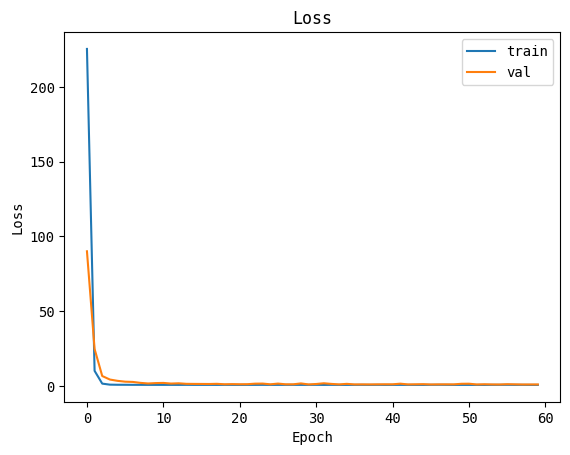

In [16]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(train_losses, label="train")
ax.plot(val_losses, label="val")
ax.legend()
ax.set_title("Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

### Evaluación del modelo

Una vez que hemos entrenado el modelo, es necesario evaluar su rendimiento en el conjunto de validación. En este caso, utilizaremos el error cuadrático medio (MSE) como métrica de evaluación.

In [17]:
model.eval()
test_losses = []
predictions = []

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target.unsqueeze(1))
        test_losses.append(loss.item() * len(data))
        predictions.append(output)
predictions = np.concatenate(predictions).ravel()
print(f"Test Loss: {sum(test_losses) / len(test_dataset)}")

Test Loss: 5.749837411628975


Ahora podemos evaluar como es que nuestra predicción se comparar con los valores reales

Text(0.5, 1.0, 'Temperature')

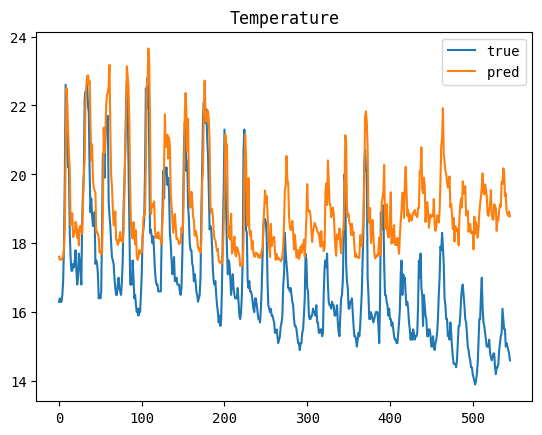

In [18]:
fig, ax = plt.subplots()
ax.plot(test_label.values, label="true")
ax.plot(predictions, label="pred")
ax.legend()
ax.set_title("Temperature")

In [19]:
# Regresión lineal
coefs = poly.polyfit(test_label.values, predictions, 1)
ffit = poly.Polynomial(coefs)
ffit

Polynomial([10.85684   ,  0.47732607], dtype=float32, domain=[-1,  1], window=[-1,  1], symbol='x')

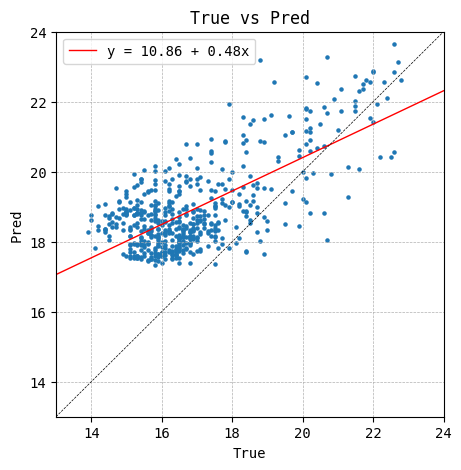

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(test_label.values, predictions, s=5)
ax.set_xlabel("True")
ax.set_ylabel("Pred")

x = np.linspace(13, 24, 100)
y = ffit(x)
ax.plot(x, y, color="red", lw=1, label=f"y = {coefs[0]:.2f} + {coefs[1]:.2f}x")

ax.legend()

ax.set_title("True vs Pred")
ax.set_xlim(13, 24)
ax.set_ylim(13, 24)

# linea de 45 grados
ax.plot([13, 24], [13, 24], ls="--", lw=0.5, color="black")

ax.grid(ls="--", lw=0.5)

## Implementación de un modelo simple en Tensorflow

En esta sección implementaremos un red neuronal artificial (ANN) en Tensorflow. El modelo consistirá de capas densas que tomará como entrada la temperatura, la humedad y velocidad del viento para predecir la temperatura de la hora siguiente.

In [21]:
import tensorflow as tf

### Separación de los datos

Usaremos los mismos datos que utilizamos en la implementación de Pytorch, por lo que no es necesario volver a realizar este paso.

### Definición del modelo

Al igual que en Pytorch, es necesario definir el modelo en Tensorflow. En este caso, utilizaremos la API de alto nivel `tf.keras` para definir el modelo. La API `tf.keras` proporciona una interfaz sencilla y eficiente para definir y entrenar modelos de Deep Learning en Tensorflow. `Keras` es una librería de alto nivel que permite definir modelos de Deep Learning de forma sencilla y eficiente, por lo que es ideal para usuarios tanto principiantes como avanzados.

In [22]:
model_keras = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)
model_keras.build(input_shape=(None, 3))

In [23]:
model_keras.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8641 (33.75 KB)
Trainable params: 8641 (33.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Luego de definir el modelo, es necesario compilarlo. Para compilar el modelo, es necesario definir la función de pérdida y el algoritmo de optimización. En este caso, utilizaremos el error cuadrático medio (MSE) como función de pérdida y el algoritmo de optimización Adam.

In [24]:
model_keras.compile(optimizer="adam", loss="mean_squared_error")

Ahora podemos entrenar el modelo y evaluar su rendimiento en el conjunto de validación.

In [25]:
model_keras.fit(
    train_data_standarized.values,
    train_label.values,
    epochs=60,
    batch_size=20,
    validation_data=(val_data_standarized.values, val_label.values),
    shuffle=True,
)

Epoch 1/60
128/128 [==============================] - 2s 9ms/step - loss: 227.4420 - val_loss: 110.8887
Epoch 2/60
128/128 [==============================] - 1s 4ms/step - loss: 16.7830 - val_loss: 34.5276
Epoch 3/60
128/128 [==============================] - 1s 4ms/step - loss: 3.6577 - val_loss: 11.9907
Epoch 4/60
128/128 [==============================] - 0s 4ms/step - loss: 1.3452 - val_loss: 5.0789
Epoch 5/60
128/128 [==============================] - 0s 4ms/step - loss: 0.8675 - val_loss: 3.3384
Epoch 6/60
128/128 [==============================] - 0s 4ms/step - loss: 0.7686 - val_loss: 2.9101
Epoch 7/60
128/128 [==============================] - 0s 4ms/step - loss: 0.7489 - val_loss: 2.5920
Epoch 8/60
128/128 [==============================] - 0s 2ms/step - loss: 0.7437 - val_loss: 1.9225
Epoch 9/60
128/128 [==============================] - 0s 3ms/step - loss: 0.7393 - val_loss: 2.2460
Epoch 10/60
128/128 [==============================] - 0s 2ms/step - loss: 0.7265 - val_loss:

Ahora podemos evaluar el rendimiento del modelo durante el entramiento y con los datos de prueba

Text(0, 0.5, 'Loss')

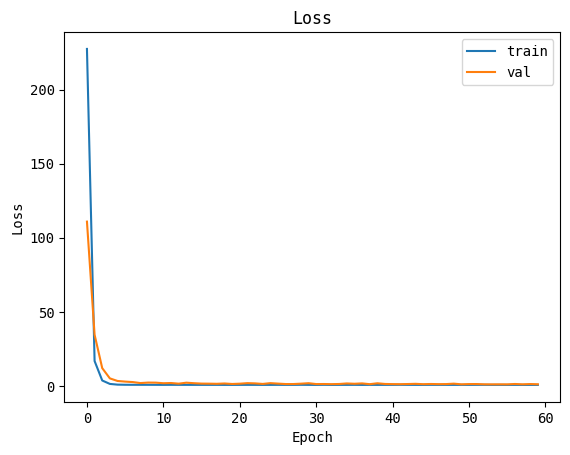

In [26]:
train_loss = model_keras.history.history["loss"]
val_loss = model_keras.history.history["val_loss"]

fig, ax = plt.subplots()
ax.plot(train_loss, label="train")
ax.plot(val_loss, label="val")
ax.legend()
ax.set_title("Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

18/18 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Temperature')

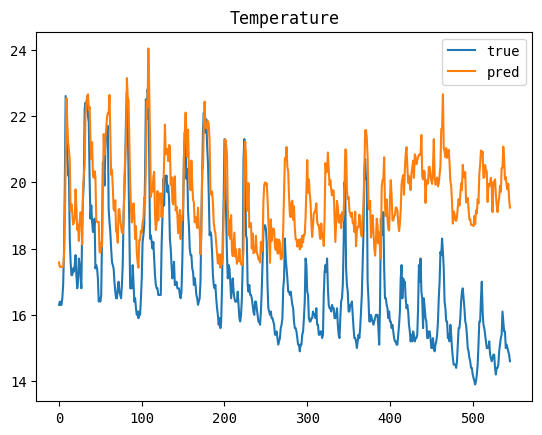

In [27]:
predictions_keras = model_keras.predict(test_data_standarized.values).ravel()

fig, ax = plt.subplots()
ax.plot(test_label.values, label="true")
ax.plot(predictions_keras, label="pred")
ax.legend()
ax.set_title("Temperature")

In [28]:
coefs_keras = poly.polyfit(test_label.values, predictions_keras, 1)
ffit_keras = poly.Polynomial(coefs_keras)
ffit_keras

Polynomial([13.339621  ,  0.36427912], dtype=float32, domain=[-1,  1], window=[-1,  1], symbol='x')

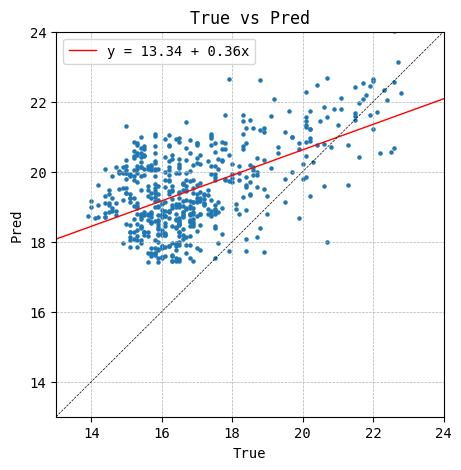

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(test_label.values, predictions_keras, s=5)
ax.set_xlabel("True")
ax.set_ylabel("Pred")

x = np.linspace(13, 24, 100)
y = ffit_keras(x)
ax.plot(
    x, y, color="red", lw=1, label=f"y = {coefs_keras[0]:.2f} + {coefs_keras[1]:.2f}x"
)

ax.legend()

ax.set_title("True vs Pred")
ax.set_xlim(13, 24)
ax.set_ylim(13, 24)

# linea de 45 grados
ax.plot([13, 24], [13, 24], ls="--", lw=0.5, color="black")

ax.grid(ls="--", lw=0.5)

## Ejercicios

Ahora que hemos implementado un modelo simple en Pytorch y Tensorflow, es hora de poner en práctica lo aprendido. A continuación se presentan una serie de ejercicios que te ayudarán a reforzar los conceptos aprendidos y a experimentar con diferentes arquitecturas de redes neuronales.

1. El modelo actual trata de pronosticar la temperatura de la hora siguiente utilizando la temperatura, la humedad y la velocidad del viento como entradas. Usando Pytorch o Tensorflow, modifica el modelo para que pronostique la temperatura de 6 horas en el futuro. ¿Cómo cambia el rendimiento del modelo? Tip: Puedes utilizar la función `shift` de `pandas` para desplazar las etiquetas en el tiempo.

2. La configuracion actual del modelo usa dos capas densas con 64 neuronas cada una. Experimenta con diferentes arquitecturas de redes neuronales, como agregar más capas, cambiar el número de neuronas o utilizar funciones de activación diferentes. ¿Cómo cambia el rendimiento del modelo? Tip: Las funciones de activación más comunes son `ReLU`, `Sigmoid` y `Tanh`.

3. Intercambie la salida del modelo para que en lugar de predecir la temperatura de la hora siguiente, prediga la velocidad del viento. ¿Cómo cambia el rendimiento del modelo?

In [33]:
# 1. Debemos de modificar el desfase en las etiquetas usadas para el entrenamiento
station_data["next_temp"] = station_data["temp"].shift(-6)
station_data = station_data.dropna()
station_data.head(7)

<ipython-input-33-942870e3d077>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data["next_temp"] = station_data["temp"].shift(-6)


,date,temp,precip,humidity,wind_dir,wind_speed,next_temp
0,2024-01-01 00:00:00,21.500000,0.0,87.0,247.0,1.7,21.400000
1,2024-01-01 01:00:00,21.400000,0.0,88.0,249.0,1.6,21.600000
2,2024-01-01 02:00:00,21.200001,0.0,88.0,253.0,1.2,21.799999
3,2024-01-01 03:00:00,21.299999,0.0,88.0,242.0,0.8,22.299999
4,2024-01-01 04:00:00,21.200001,0.0,89.0,233.0,1.2,23.100000
5,2024-01-01 05:00:00,21.200001,0.0,88.0,225.0,1.2,24.200001
6,2024-01-01 06:00:00,21.400000,0.0,86.0,242.0,0.6,25.400000


In [34]:
train_size = int(len(station_data) * 0.7)
val_size = int(len(station_data) * 0.15)
test_size = len(station_data) - train_size - val_size

train_data = station_data[["temp", "humidity", "wind_speed"]].iloc[:train_size]
train_label = station_data["next_temp"].iloc[:train_size]

val_data = station_data[["temp", "humidity", "wind_speed"]].iloc[
    train_size : train_size + val_size
]
val_label = station_data["next_temp"].iloc[train_size : train_size + val_size]

test_data = station_data[["temp", "humidity", "wind_speed"]].iloc[
    train_size + val_size :
]
test_label = station_data["next_temp"].iloc[train_size + val_size :]

mean = train_data.mean()
std = train_data.std()

train_data_standarized = (train_data - mean) / std
val_data_standarized = (val_data - mean) / std
test_data_standarized = (test_data - mean) / std

In [35]:
model_keras = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)
model_keras.build(input_shape=(None, 3))
model_keras.compile(optimizer="adam", loss="mean_squared_error")

model_keras.fit(
    train_data_standarized.values,
    train_label.values,
    epochs=60,
    batch_size=20,
    validation_data=(val_data_standarized.values, val_label.values),
    shuffle=True,
)

Epoch 1/60
127/127 [==============================] - 1s 4ms/step - loss: 255.2749 - val_loss: 197.8984
Epoch 2/60
127/127 [==============================] - 0s 2ms/step - loss: 18.6397 - val_loss: 57.5074
Epoch 3/60
127/127 [==============================] - 0s 3ms/step - loss: 5.5833 - val_loss: 27.1524
Epoch 4/60
127/127 [==============================] - 0s 3ms/step - loss: 4.0908 - val_loss: 20.3020
Epoch 5/60
127/127 [==============================] - 0s 2ms/step - loss: 3.7942 - val_loss: 15.5140
Epoch 6/60
127/127 [==============================] - 0s 3ms/step - loss: 3.7622 - val_loss: 14.7146
Epoch 7/60
127/127 [==============================] - 0s 3ms/step - loss: 3.7737 - val_loss: 12.4751
Epoch 8/60
127/127 [==============================] - 1s 4ms/step - loss: 3.7247 - val_loss: 11.6362
Epoch 9/60
127/127 [==============================] - 0s 4ms/step - loss: 3.7856 - val_loss: 11.1702
Epoch 10/60
127/127 [==============================] - 0s 4ms/step - loss: 3.7156 - val

Text(0, 0.5, 'Loss')

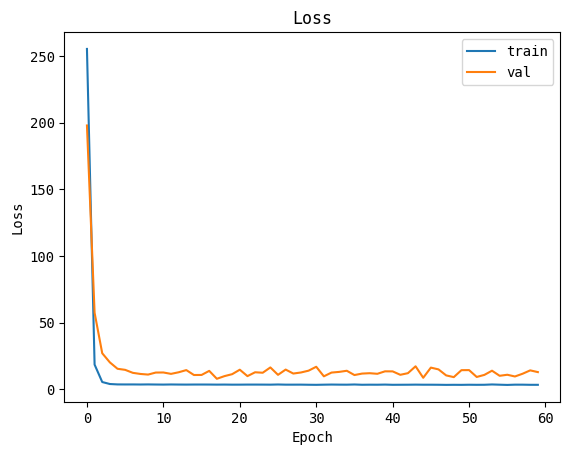

In [36]:
train_loss = model_keras.history.history["loss"]
val_loss = model_keras.history.history["val_loss"]

fig, ax = plt.subplots()
ax.plot(train_loss, label="train")
ax.plot(val_loss, label="val")
ax.legend()
ax.set_title("Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

17/17 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Temperature')

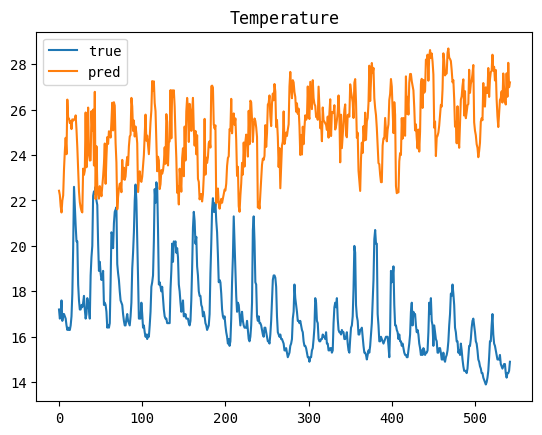

In [37]:
predictions_keras = model_keras.predict(test_data_standarized.values).ravel()

fig, ax = plt.subplots()
ax.plot(test_label.values, label="true")
ax.plot(predictions_keras, label="pred")
ax.legend()
ax.set_title("Temperature")

El resultado obtenido al cambiar el pronóstico a 6h hacia adelante no es para nada bueno. El modelo no esta generalizando bien o la data de entrada no es suficiente para pronosticar dichos cambios.

Epoch 1/60
127/127 [==============================] - 2s 4ms/step - loss: 173.3786 - val_loss: 107.1703
Epoch 2/60
127/127 [==============================] - 0s 2ms/step - loss: 12.2077 - val_loss: 18.1923
Epoch 3/60
127/127 [==============================] - 0s 3ms/step - loss: 4.0614 - val_loss: 16.1586
Epoch 4/60
127/127 [==============================] - 0s 3ms/step - loss: 3.8294 - val_loss: 11.4144
Epoch 5/60
127/127 [==============================] - 0s 3ms/step - loss: 3.9040 - val_loss: 18.3730
Epoch 6/60
127/127 [==============================] - 0s 3ms/step - loss: 3.7956 - val_loss: 17.5622
Epoch 7/60
127/127 [==============================] - 0s 3ms/step - loss: 3.7658 - val_loss: 11.0544
Epoch 8/60
127/127 [==============================] - 0s 2ms/step - loss: 3.7195 - val_loss: 14.3889
Epoch 9/60
127/127 [==============================] - 0s 3ms/step - loss: 3.7062 - val_loss: 13.7704
Epoch 10/60
127/127 [==============================] - 0s 2ms/step - loss: 3.7507 - val

Text(0.5, 1.0, 'Temperature')

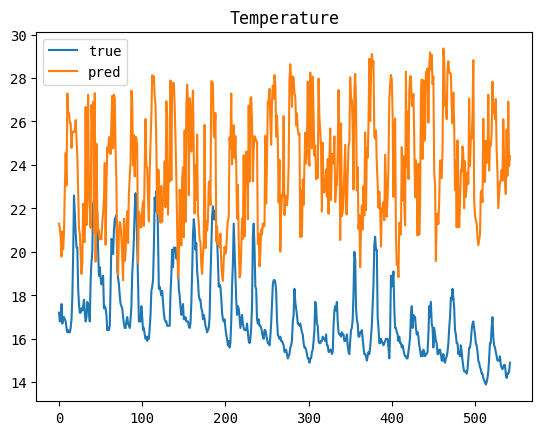

In [40]:
# 2. Modificamos la red con mas capas densas

model_keras = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)
model_keras.build(input_shape=(None, 3))
model_keras.compile(optimizer="adam", loss="mean_squared_error")

model_keras.fit(
    train_data_standarized.values,
    train_label.values,
    epochs=60,
    batch_size=20,
    validation_data=(val_data_standarized.values, val_label.values),
    shuffle=True,
)

predictions_keras = model_keras.predict(test_data_standarized.values).ravel()

fig, ax = plt.subplots()
ax.plot(test_label.values, label="true")
ax.plot(predictions_keras, label="pred")
ax.legend()
ax.set_title("Temperature")

Epoch 1/60
127/127 [==============================] - 1s 4ms/step - loss: 180.6338 - val_loss: 16.4296
Epoch 2/60
127/127 [==============================] - 0s 3ms/step - loss: 5.2939 - val_loss: 9.8740
Epoch 3/60
127/127 [==============================] - 0s 3ms/step - loss: 4.9573 - val_loss: 8.9134
Epoch 4/60
127/127 [==============================] - 0s 3ms/step - loss: 4.6565 - val_loss: 6.9646
Epoch 5/60
127/127 [==============================] - 0s 3ms/step - loss: 4.4196 - val_loss: 4.9557
Epoch 6/60
127/127 [==============================] - 0s 3ms/step - loss: 4.2280 - val_loss: 9.1361
Epoch 7/60
127/127 [==============================] - 0s 3ms/step - loss: 4.0535 - val_loss: 4.6822
Epoch 8/60
127/127 [==============================] - 0s 3ms/step - loss: 3.8871 - val_loss: 4.2861
Epoch 9/60
127/127 [==============================] - 0s 3ms/step - loss: 3.7475 - val_loss: 5.3154
Epoch 10/60
127/127 [==============================] - 0s 3ms/step - loss: 3.6928 - val_loss: 4.7

Text(0.5, 1.0, 'Temperature')

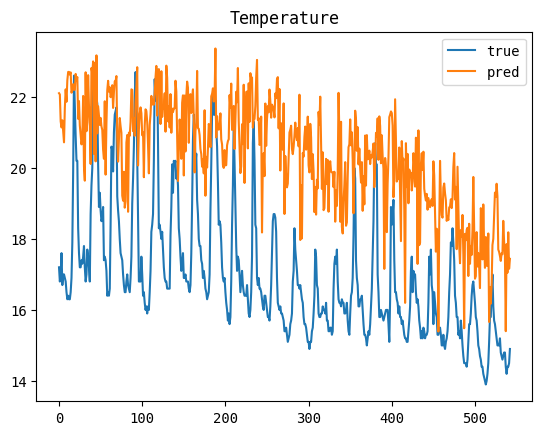

In [47]:
# 2. Ahora podemos intentar con más neuronas en la capa densa y con otra funcion de activacion

model_keras = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(128, activation="tanh"),
        tf.keras.layers.Dense(128, activation="tanh"),
        tf.keras.layers.Dense(128, activation="tanh"),
        tf.keras.layers.Dense(1),
    ]
)
model_keras.build(input_shape=(None, 3))
model_keras.compile(optimizer="adam", loss="mean_squared_error")

model_keras.fit(
    train_data_standarized.values,
    train_label.values,
    epochs=60,
    batch_size=20,
    validation_data=(val_data_standarized.values, val_label.values),
    shuffle=True,
)

predictions_keras = model_keras.predict(test_data_standarized.values).ravel()

fig, ax = plt.subplots()
ax.plot(test_label.values, label="true")
ax.plot(predictions_keras, label="pred")
ax.legend()
ax.set_title("Temperature")

In [48]:
# 3. Vamos a cambiar la variable de salida a velocidad de viento

station_data["next_wind"] = station_data["wind_speed"].shift(-1)
station_data = station_data.dropna()

train_size = int(len(station_data) * 0.7)
val_size = int(len(station_data) * 0.15)
test_size = len(station_data) - train_size - val_size

train_data = station_data[["temp", "humidity", "wind_speed"]].iloc[:train_size]
train_label = station_data["next_wind"].iloc[:train_size]

val_data = station_data[["temp", "humidity", "wind_speed"]].iloc[
    train_size : train_size + val_size
]
val_label = station_data["next_wind"].iloc[train_size : train_size + val_size]

test_data = station_data[["temp", "humidity", "wind_speed"]].iloc[
    train_size + val_size :
]
test_label = station_data["next_wind"].iloc[train_size + val_size :]

mean = train_data.mean()
std = train_data.std()

train_data_standarized = (train_data - mean) / std
val_data_standarized = (val_data - mean) / std
test_data_standarized = (test_data - mean) / std

Epoch 1/60
127/127 [==============================] - 2s 4ms/step - loss: 0.3603 - val_loss: 0.2580
Epoch 2/60
127/127 [==============================] - 0s 3ms/step - loss: 0.1805 - val_loss: 0.2065
Epoch 3/60
127/127 [==============================] - 0s 3ms/step - loss: 0.1789 - val_loss: 0.1989
Epoch 4/60
127/127 [==============================] - 0s 3ms/step - loss: 0.1710 - val_loss: 0.2145
Epoch 5/60
127/127 [==============================] - 0s 3ms/step - loss: 0.1693 - val_loss: 0.2003
Epoch 6/60
127/127 [==============================] - 0s 3ms/step - loss: 0.1720 - val_loss: 0.2859
Epoch 7/60
127/127 [==============================] - 0s 3ms/step - loss: 0.1717 - val_loss: 0.2286
Epoch 8/60
127/127 [==============================] - 0s 3ms/step - loss: 0.1680 - val_loss: 0.1901
Epoch 9/60
127/127 [==============================] - 0s 3ms/step - loss: 0.1707 - val_loss: 0.2627
Epoch 10/60
127/127 [==============================] - 0s 3ms/step - loss: 0.1690 - val_loss: 0.1938

Text(0.5, 1.0, 'Wind Speed')

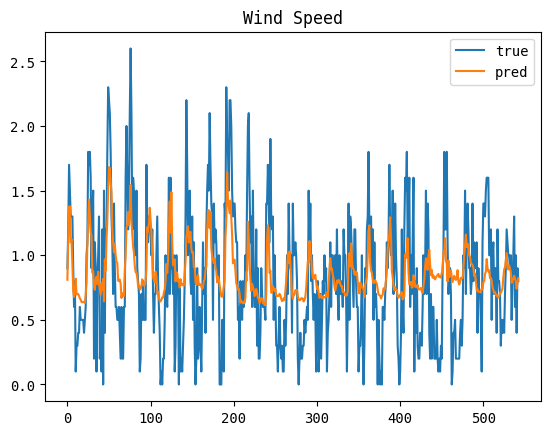

In [49]:
model_keras = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(128, activation="tanh"),
        tf.keras.layers.Dense(128, activation="tanh"),
        tf.keras.layers.Dense(128, activation="tanh"),
        tf.keras.layers.Dense(1),
    ]
)
model_keras.build(input_shape=(None, 3))
model_keras.compile(optimizer="adam", loss="mean_squared_error")

model_keras.fit(
    train_data_standarized.values,
    train_label.values,
    epochs=60,
    batch_size=20,
    validation_data=(val_data_standarized.values, val_label.values),
    shuffle=True,
)

predictions_keras = model_keras.predict(test_data_standarized.values).ravel()

fig, ax = plt.subplots()
ax.plot(test_label.values, label="true")
ax.plot(predictions_keras, label="pred")
ax.legend()
ax.set_title("Wind Speed")